
### Universidade Federal de Pernambuco - IF998 (Solução em Mineração de Dados)

### Professor: Leandro Almeida - lma3@cin.ufpe.br

### Alunos: 
- Daniel Moraes Costa Andrade - dmca@cin.ufpe.br
- Gustavo Prazeres Paz do Nascimento - gppn@cin.ufpe.br
- Vinicius Luiz da Silva Franca - vlsf2@cin.ufpe.br

## Aula/Missão 06 - SVM - Realizar uma comparação de diferentes configurações de SVM

### -------------------------------------------------------

Com base no código do Scikit learning (https://scikit-learn.org/stable/modules/svm.html) executar diferentes configurações de SVM (com os quatro kernels) para a classificação da base de dados Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval):

- Importante realizar a análise exploratória e o pré-processamento dos dados

- Dividir o conjunto de dados em treinamento e teste e realizar o Repeated K-Fold (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html) com 5x10

# Importando bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [2]:

dt_parameters = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"

dataset = pd.read_csv(url, delimiter=",", names=dt_parameters)

no_registros = dataset.shape[0]
no_atributos = dataset.shape[1]

print(f'Carregado com sucesso! \n\nO Dataset possui {no_registros} registros com {no_atributos} atributos cada\n')

print('Exibindo os 10 primeiros registros:')
dataset.head(10)

Carregado com sucesso! 

O Dataset possui 690 registros com 16 atributos cada

Exibindo os 10 primeiros registros:


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [4]:
dataset.shape

(690, 16)

# Descrevendo o Dataset

Pandas describe() é usado para visualizar alguns detalhes estatísticos básicos como percentil, média, std etc. de um quadro de dados ou uma série de `valores numéricos`

In [5]:
dataset.describe([.20, .40, .60, .80])

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
20%,0.750000,0.125000,0.00000,0.000000
40%,1.934000,0.500000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
60%,4.016000,1.500000,1.00000,50.000000
80%,9.432000,3.500000,4.00000,600.000000
max,28.000000,28.500000,67.00000,100000.000000


# Pré-Processamento 

**1. Limpeza de dados**


In [6]:
dataset[dataset.eq("?").any(1)] # Verificando todas as linhas que possuem os valores nulos (interrogações)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


# Substituição de variáveis categóricas

Ao mostrar as informações do dataset, vemos que a coluna ZipCode possui valores numéricos está com a tipagem errada, vamos alterar pois este atributo apresenta dados bem distribuídos que são interessantes para exploração

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Vamos inserir o valor da média do atributo Age nos valores inconsistentes. Essa é uma forma de tratar dados inconsistentes sem que interfira negativamente nas análises posteriores.

In [8]:
# CONVERTENDO COLUNA Age EM NUMÉRICO

dataset_Age = dataset[dataset['Age'] == '?'] #Pegar valores inconsistentes em Age
dataset    =  dataset[dataset['Age'] != '?'] #Pegar valores consistentes em Age

dataset.Age = dataset.Age.astype(np.float32) #Convertendo atributo Age para numérico
dataset_Age.loc[(dataset_Age['Age'] == '?'), 'Age'] = dataset['Age'].mean() #Inserindo a média de Age nas instâncias inconsistentes
dataset_Age.Age = dataset_Age.Age.astype(np.float32)
dataset = pd.concat([dataset, dataset_Age], axis=0) #Concatenando e finalizando ajuste

dataset.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568172,4.758725,2.223406,2.40000,1017.385507
std,11.853271,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [9]:
dataset.sort_index(ascending=True, inplace=True)
dataset

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.080000,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.670000,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.250000,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.920000,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [10]:
dataset.replace('?', np.nan, inplace = True) # Substituindo as interrogações por um valor numérico nulo
dataset.isnull().sum() # Validando que as interrogações foram de fato substituídas por valores nulos

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [11]:
dataset.shape

(690, 16)

In [12]:
dataset = dataset.dropna()
dataset.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [13]:
dataset.reset_index(drop=True, inplace=True)
dataset

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,b,21.080000,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
660,a,22.670000,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
661,a,25.250000,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
662,b,17.920000,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [14]:
print(f' Nosso dataset agora possui {dataset.shape[0]} linhas.')

 Nosso dataset agora possui 664 linhas.


Substituindo nossa classe Approved por booleano

In [15]:
dataset['Approved'].replace(['+', '-'],
                        [1, 0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Já nesse outro Boxplot agrupado pela coluna [Approved], ao analisar o 3º quartil e o limite superior da classe [+], podemos notar que o grupo da classe [+] possuem valores consideravelmente maiores em comparação com o grupo [-].

# Transformação de Dados

## Normalização dos dados


In [16]:
dataset.sort_index(ascending=True,inplace=True)
dataset

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,b,21.080000,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
660,a,22.670000,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
661,a,25.250000,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
662,b,17.920000,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0


In [17]:
# DADOS NUMÉRICOS

def mean_norm(dataset):
    return dataset.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

numerics_dataset = dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
numerics_dataset = mean_norm(numerics_dataset)
numerics_dataset.head()


,Age,Debt,YearsEmployed,CreditScore,Income
0,-0.057487,-0.958978,-0.300443,-0.297501,-0.192583
1,2.313963,-0.067795,0.231090,0.715529,-0.085122
2,-0.596685,-0.859070,-0.226206,-0.500108,-0.034462
3,-0.313031,-0.651260,0.441921,0.512923,-0.192007
4,-0.965521,0.164992,-0.163848,-0.500108,-0.192583


In [18]:
numerics_dataset.shape

(664, 5)

In [19]:
## DADOS NUMÉRICOS NORMALIZADOS
dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']] = numerics_dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,-0.057487,-0.958978,u,g,w,v,-0.300443,t,t,-0.297501,f,g,00202,-0.192583,1
1,a,2.313963,-0.067795,u,g,q,h,0.231090,t,t,0.715529,f,g,00043,-0.085122,1
2,a,-0.596685,-0.859070,u,g,q,h,-0.226206,t,f,-0.500108,f,g,00280,-0.034462,1
3,b,-0.313031,-0.651260,u,g,w,v,0.441921,t,t,0.512923,t,g,00100,-0.192007,1
4,b,-0.965521,0.164992,u,g,w,v,-0.163848,t,f,-0.500108,f,s,00120,-0.192583,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,b,-0.888006,1.056176,y,p,e,h,-0.300443,f,f,-0.500108,f,g,00260,-0.192583,0
660,a,-0.752567,-0.809116,u,g,c,v,-0.077733,f,t,-0.094895,t,g,00200,-0.116976,0
661,a,-0.532799,1.738550,y,p,ff,ff,-0.077733,f,t,-0.297501,t,g,00200,-0.192391,0
662,b,-1.157179,-0.918016,u,g,aa,v,-0.659746,f,f,-0.500108,f,g,00280,-0.048662,0


# Redução de dados e Métodos para seleção de atributos

In [20]:
dataset.nunique()

Male                2
Age               341
Debt              213
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
YearsEmployed     131
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           166
Income            232
Approved            2
dtype: int64

In [21]:
# CONVERTENDO VALORES CATEGÓRICOS EM NUMÉRICOS (BINÁRIOS)
from sklearn.preprocessing import OneHotEncoder

# SELEÇÃO DE DADOS CATEGÓRICOS
attr_drop=  ['EducationLevel', 'Ethnicity', 'Citizen', 'ZipCode']
for attr in attr_drop:
  dataset.drop(attr, axis=1, inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Male,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,b,-0.057487,-0.958978,u,g,-0.300443,t,t,-0.297501,f,-0.192583,1
1,a,2.313963,-0.067795,u,g,0.231090,t,t,0.715529,f,-0.085122,1
2,a,-0.596685,-0.859070,u,g,-0.226206,t,f,-0.500108,f,-0.034462,1
3,b,-0.313031,-0.651260,u,g,0.441921,t,t,0.512923,t,-0.192007,1
4,b,-0.965521,0.164992,u,g,-0.163848,t,f,-0.500108,f,-0.192583,1


In [22]:
# Armazenando atributo de classe para futura análise do PCA
class_dataset = dataset[['Approved']]

É possível verificar que os dados estão normalizados

In [23]:
class_dataset.value_counts()

Approved
0           366
1           298
dtype: int64

In [24]:
print("selecionar apenas as colunas que sao do tipo objeto/categorigos\n")
categorical_dataset = dataset.select_dtypes(include=['object']).copy()

onehotenconder = OneHotEncoder() 
categorical_dataset_ohe = onehotenconder.fit_transform(categorical_dataset).toarray()
print(f'Os {dataset.shape[1]} atributos categóricos foram transformados em {categorical_dataset.shape[1]} Colunas')

selecionar apenas as colunas que sao do tipo objeto/categorigos

Os 12 atributos categóricos foram transformados em 6 Colunas


In [25]:
feature_names_ohe = onehotenconder.get_feature_names(categorical_dataset.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
categorical_dataset_ohe = pd.DataFrame(categorical_dataset_ohe, columns=feature_names_ohe)

categorical_dataset_ohe

,Male_a,Male_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
660,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
661,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
662,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Como os algoritmos não realizam predições com atributos categóricos, o estado final do Dataset deverá ser este, com todos os atributos numéricos para que os algoritmos possam realizar predições eficientes. Com isso, este dataset se torna inelegível para análise humana, fazendo com que os dados não tenham um sentido aparente.

In [27]:
# ESTADO FINAL DO DATASET

numerics_dataset = dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
dataset = pd.concat([categorical_dataset_ohe, numerics_dataset], axis=1) #Uma coluna ao lado da outra
dataset

,Male_a,Male_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Age,Debt,YearsEmployed,CreditScore,Income
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.057487,-0.958978,-0.300443,-0.297501,-0.192583
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.313963,-0.067795,0.231090,0.715529,-0.085122
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.596685,-0.859070,-0.226206,-0.500108,-0.034462
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.313031,-0.651260,0.441921,0.512923,-0.192007
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.965521,0.164992,-0.163848,-0.500108,-0.192583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.888006,1.056176,-0.300443,-0.500108,-0.192583
660,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.752567,-0.809116,-0.077733,-0.094895,-0.116976
661,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.532799,1.738550,-0.077733,-0.297501,-0.192391
662,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.157179,-0.918016,-0.659746,-0.500108,-0.048662


# Separando a base de treino e teste

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, class_dataset, test_size=0.25) # Vamos utilizar 75% dos dados para treinar a máquina e 25% para testar

In [29]:
print(f'{X_train.shape[0]} dados para treinar o modelo')

498 dados para treinar o modelo


In [30]:
print(f'{X_test.shape[0]} dados para testar o modelo')

166 dados para testar o modelo


## Aplicando K-NN

### Separando a base de teste e a base de treino
Com base nos atributos previsores (X_train), queremos fazer a previsão se a pessoa é da classe **+** ou **-** em y_train

In [31]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
 
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

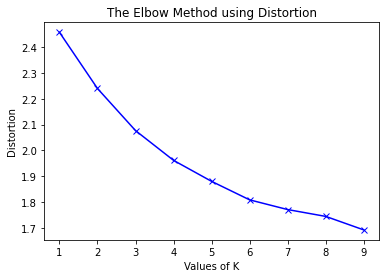

In [32]:
plt.plot(K, distortions,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Realizar previsões para a base de dados teste

In [34]:
y_pred = classifier.predict(X_test)

Vamos gerar uma matriz de confusão para que possamos avaliar o algoritmo
- **EIXO Y**: TRUE CLASS
- **EIXO X**: PREDICTION

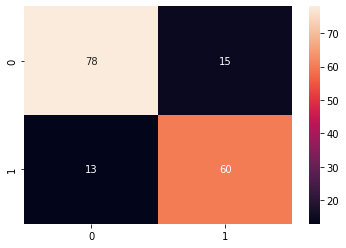

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [36]:
from sklearn.metrics import classification_report
classification_r = classification_report(y_test, y_pred)
print(classification_r)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.80      0.82      0.81        73

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.83      0.83      0.83       166



Ao analisar as métricas acima, é possível notar que o algoritmo obteve um bom desempenho com uma acurácia de mais de 80% (que é um número bem válido no quesito de aprendizado de máquina), além de ter um recall, f1-score e precisão com uma % bem semelhante a acurária, mantendo a média do resultado. Ademais, o matriz de confusão mostrou um bom resultado, já que a diferença de falso-positivos e verdadeiros-positivos foi bem consideradável, o mesmo para o falso-negativo.

# Aplicando Árvore de Decisão

### Construindo um classificador com árvores de decisão

In [37]:
from sklearn import tree


# Constroi um classificador com arvore de decisao
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)


#Treinamento
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

### Visualização textual da árvore gerada:

In [38]:
export_txt = tree.export_text(model)
print(export_txt)

|--- feature_9 <= 0.50
|   |--- feature_15 <= -0.88
|   |   |--- feature_15 <= -0.89
|   |   |   |--- feature_15 <= -0.93
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_14 <= 0.24
|   |   |   |   |   |   |--- feature_16 <= -0.60
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_16 >  -0.60
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_14 >  0.24
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_15 >  -0.93
|   |   |   |   |--- class: 0
|   |   |--- feature_15 >  -0.89
|   |   |   |--- class: 1
|   |--- feature_15 >  -0.88
|   |   |--- feature_16 <= -0.26
|   |   |   |--- feature_14 <= 1.40
|   |   |   |   |--- feature_15 <= -0.82
|   |   |   |   |   |--- feature_15 <= -0.83
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_15 >  -0.83
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   | 

### Representação por imagem

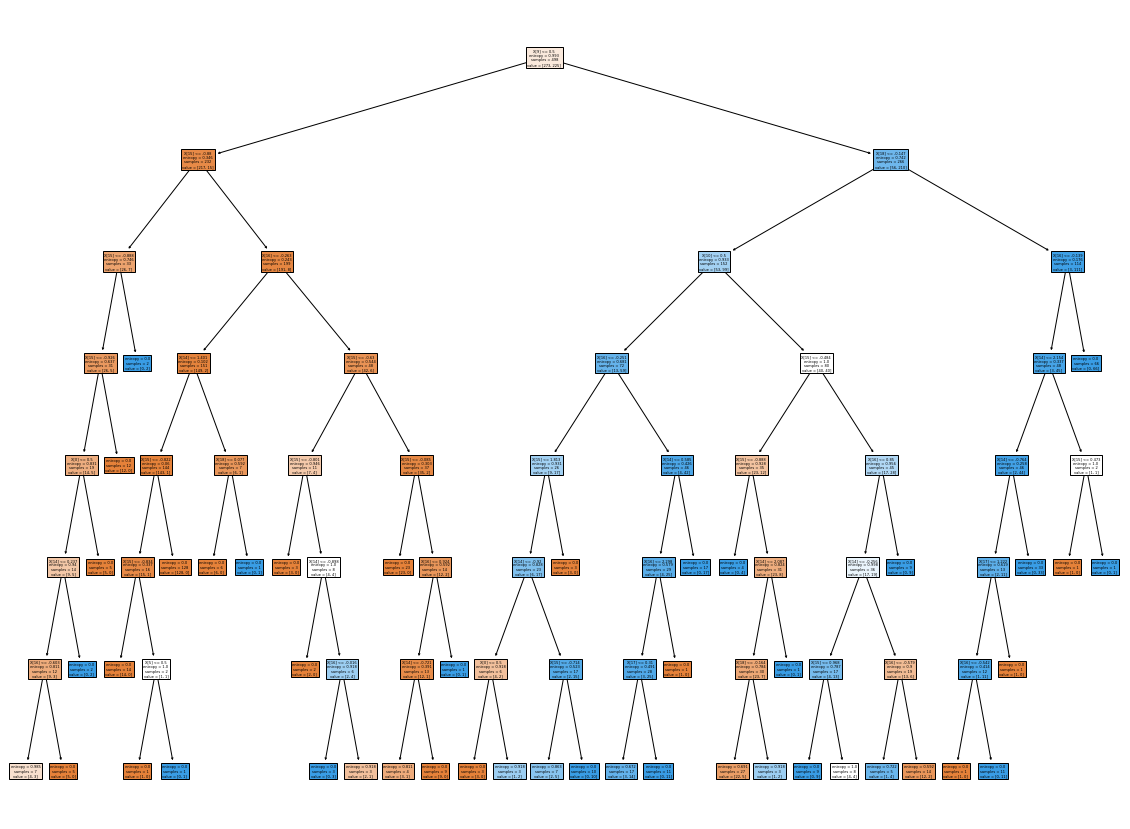

In [39]:
imagem = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model, filled=True)

### Validando a acurácia


In [40]:
predict = model.predict(X_test)

model.score(X_test, y_test)

0.8313253012048193

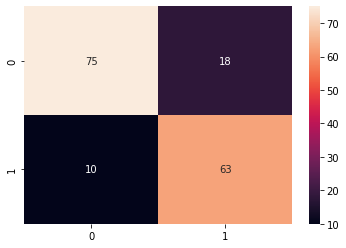

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='g')

In [42]:
from sklearn.metrics import classification_report
classification_r = classification_report(y_test, predict)
print(classification_r)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        93
           1       0.78      0.86      0.82        73

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.84      0.83      0.83       166



# Aplicando Support Vector Machines

### Construindo um classificador com SVM


In [91]:
# evaluate model by averaging performance across each fold
from numpy import mean, std
from sklearn.model_selection import RepeatedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
def k_fold_cross_validation (model):
  '''k-fold cross validation'''
  scores           = list()
  precision        = list()
  recall           = list()
  f1               = list()
  kfold            = RepeatedKFold(n_splits=10, n_repeats=5)
  dataset_np       = dataset.to_numpy()
  class_dataset_np = class_dataset.to_numpy()

  # enumerate splits
  for train_ix, test_ix in kfold.split(dataset_np):
    # get data
    train_X, test_X = dataset_np[train_ix], dataset_np[test_ix]
    train_y, test_y = class_dataset_np[train_ix], class_dataset_np[test_ix]
    # fit model
    model.fit(train_X, train_y)
    # evaluate model
    yhat = model.predict(test_X)
    # Realizando métricas
    acc = accuracy_score(test_y, yhat)
    prec = precision_score(test_y, yhat)
    rec = recall_score(test_y, yhat)
    f1s = f1_score(test_y, yhat)
    # Armazenando métricas
    scores.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1.append(f1s)
  # summarize model performance
  return mean(precision), mean(recall), mean(f1), mean(scores), std(scores)

## Linear

In [93]:
%%capture
clf_linear    = svm.SVC(kernel='linear')
precision_s, recall_s, f1_s, mean_s, std_s = k_fold_cross_validation(clf_linear)

In [94]:
print(f'Em média:\n1- O modelo linear identifica corretamente {round(recall_s*100, 2)}% das pessoas terão crédito aprovado')
print(f'2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em {round(precision_s*100, 2)}% das vezes')
print(f'Acurácia: {round(mean_s*100, 2)}% ({round(std_s*100, 2)} de desvio padrão)')
print(f'F1_SCORE: {round(f1_s*100,2)}%')

Em média:
1- O modelo linear identifica corretamente 94.35% das pessoas terão crédito aprovado
2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em 78.94% das vezes
Acurácia: 86.23% (3.56 de desvio padrão)
F1_SCORE: 85.79%


## Poly

In [95]:
%%capture
clf_poly    = svm.SVC(kernel='poly')
precision_s, recall_s, f1_s, mean_s, std_s = k_fold_cross_validation(clf_poly)

In [96]:
print(f'Em média:\n1- O modelo poly identifica corretamente {round(recall_s*100, 2)}% das pessoas terão crédito aprovado')
print(f'2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em {round(precision_s*100, 2)}% das vezes')
print(f'Acurácia: {round(mean_s*100, 2)}% ({round(std_s*100, 2)} de desvio padrão)')
print(f'F1_SCORE: {round(f1_s*100,2)}%')

Em média:
1- O modelo poly identifica corretamente 89.13% das pessoas terão crédito aprovado
2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em 79.81% das vezes
Acurácia: 85.06% (4.31 de desvio padrão)
F1_SCORE: 84.01%


## RBF

In [97]:
%%capture
clf_rbf    = svm.SVC(kernel='rbf')
precision_s, recall_s, f1_s, mean_s, std_s = k_fold_cross_validation(clf_rbf)

In [98]:
print(f'Em média:\n1- O modelo rbf identifica corretamente {round(recall_s*100, 2)}% das pessoas terão crédito aprovado')
print(f'2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em {round(precision_s*100, 2)}% das vezes')
print(f'Acurácia: {round(mean_s*100, 2)}% ({round(std_s*100, 2)} de desvio padrão)')
print(f'F1_SCORE: {round(f1_s*100,2)}%')

Em média:
1- O modelo rbf identifica corretamente 93.02% das pessoas terão crédito aprovado
2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em 79.2% das vezes
Acurácia: 85.84% (4.05 de desvio padrão)
F1_SCORE: 85.37%


## Sigmoid

In [99]:
%%capture
clf_sigmoid    = svm.SVC(kernel='sigmoid')
precision_s, recall_s, f1_s, mean_s, std_s = k_fold_cross_validation(clf_sigmoid)

In [100]:
print(f'Em média:\n1- O modelo sigmoid identifica corretamente {round(recall_s*100, 2)}% das pessoas terão crédito aprovado')
print(f'2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em {round(precision_s*100, 2)}% das vezes')
print(f'Acurácia: {round(mean_s*100, 2)}% ({round(std_s*100, 2)} de desvio padrão)')
print(f'F1_SCORE: {round(f1_s*100,2)}%')

Em média:
1- O modelo sigmoid identifica corretamente 74.81% das pessoas terão crédito aprovado
2- Quando o modelo prevê que o indivíduo terá o crédito aprovado, o modelo está correto em 75.14% das vezes
Acurácia: 77.59% (4.57 de desvio padrão)
F1_SCORE: 74.65%


# *Referências*

- **George Seif** - *A Guide to Decision Trees for Machine Learning and Data Science* https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956

- **Cory Maklin** - *Decision Tree In Python* -  https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

- **1.4. Support Vector Machines** - https://scikit-learn.org/stable/modules/svm.html

- **How to Use Out-of-Fold Predictions in Machine Learning** - https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/
